<a href="https://colab.research.google.com/github/angiepabelic/sales-predictions/blob/main/sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jan Angielyn Pabelic
Date created: September 18, 2022
Last edited: October 3, 2022

In [1]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Explore data
file_path = '/content/drive/MyDrive/sales_predictions (2).csv'
df = pd.read_csv(file_path)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.shape

(8523, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
# Identify and drop any duplicates
df[df.duplicated(keep = False)]
df.drop_duplicates(inplace = True)

In [7]:
# Identify the missing values. Evaluate what to do with it
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
# Drop outlet size column
df.drop('Outlet_Size', axis= 1, inplace = True)

In [12]:
# Addressing the missing values in Item Weight. I'll be using the Item Identifier to know the missing weight of the items for the same items would have the same weight
weight = df['Item_Weight'].isna()
index = df[['Item_Weight','Item_Identifier']][~weight]
item_dict = index.set_index('Item_Identifier')['Item_Weight'].T.to_dict()
df['Item_Weight'] = df.Item_Identifier.map(item_dict)

In [13]:
# Fix any inconsistent categories
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [16]:
df.replace({'Item_Fat_Content':{'reg': 'Regular', 'LF':'Low Fat','low fat':'Low Fat'}}, inplace = True)

In [18]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [20]:
# obtain the summary statistics of each (min, max, mean) i will use the aggregate funtion
df.agg({'Item_Weight': ['mean','max','min'], 'Item_Outlet_Sales': ['mean','max','min'], 'Item_Visibility' : ['mean','max','min']})


,Item_Weight,Item_Outlet_Sales,Item_Visibility
mean,12.87542,2181.288914,0.066132
max,21.35000,13086.964800,0.328391
min,4.55500,33.290000,0.000000


In [ ]:
# Part 3

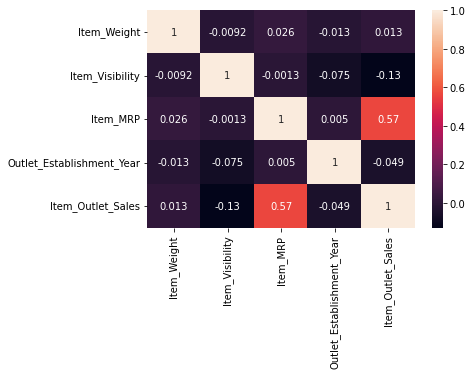

In [23]:
#I want to know the correlation of the variables (I'll use a heatmap)
correlation =df.corr()
sns.heatmap(correlation, annot = True);

item mrp and item outlet sales have a moderate correlation